<h1>Mnist 多层感知器版更换初始化<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#初始化模型参数-normal" data-toc-modified-id="初始化模型参数-normal-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>初始化模型参数-normal</a></span></li><li><span><a href="#初始化模型参数-zero" data-toc-modified-id="初始化模型参数-zero-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>初始化模型参数-zero</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 初始化模型参数-normal

In [3]:
# 初始化模型参数
sjy=100
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,sjy],mean=0,stddev=(2/sjy)**0.5,seed=66))
b1 = tf.Variable(tf.zeros([sjy]))
W2 = tf.Variable(tf.truncated_normal([sjy,sjy],mean=0,stddev=(2/sjy)**0.5,seed=66))
b2 = tf.Variable(tf.zeros([sjy]))
W3 = tf.Variable(tf.truncated_normal([sjy,sjy],mean=0,stddev=(2/sjy)**0.5,seed=66))
b3 = tf.Variable(tf.zeros([sjy]))
W4 = tf.Variable(tf.truncated_normal([sjy,sjy],mean=0,stddev=(2/sjy)**0.5,seed=66))
b4 = tf.Variable(tf.zeros([sjy]))
W5 = tf.Variable(tf.truncated_normal([sjy,10 ],mean=0,stddev=(2/sjy)**0.5,seed=66))
b5 = tf.Variable(tf.zeros([10]))

In [4]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [6]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [7]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

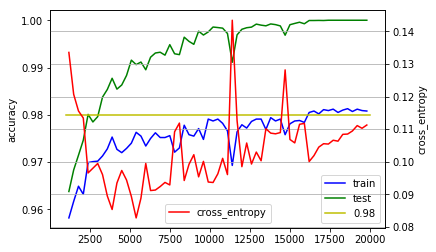

In [8]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [9]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.133499,0.120669,0.115574,0.113413,0.096596,0.098038,0.099486,0.096098,0.089534,0.085398,...,0.105542,0.10544,0.106606,0.106322,0.108414,0.1085,0.109444,0.111092,0.110268,0.111268
test,0.963782,0.968345,0.971455,0.974636,0.980091,0.978491,0.979618,0.983745,0.985364,0.987727,...,0.999945,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000
train,0.958200,0.961700,0.964900,0.963200,0.969900,0.970100,0.970200,0.971300,0.972800,0.975300,...,0.981100,0.98090,0.981200,0.980500,0.981000,0.9813,0.980700,0.981200,0.980900,0.980800


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化
- 初始化**多层隐层改变初始化后97.7%**
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 初始化模型参数-zero

In [10]:
# 初始化模型参数
sjy=100
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,sjy],mean=0,stddev=(1/sjy)**0.5,seed=66))
b1 = tf.Variable(tf.zeros([sjy]))
W2 = tf.Variable(tf.truncated_normal([sjy,sjy],mean=0,stddev=(1/sjy)**0.5,seed=66))
b2 = tf.Variable(tf.zeros([sjy]))
W3 = tf.Variable(tf.truncated_normal([sjy,sjy],mean=0,stddev=(1/sjy)**0.5,seed=66))
b3 = tf.Variable(tf.zeros([sjy]))
W4 = tf.Variable(tf.truncated_normal([sjy,sjy],mean=0,stddev=(1/sjy)**0.5,seed=66))
b4 = tf.Variable(tf.zeros([sjy]))
W5 = tf.Variable(tf.truncated_normal([sjy,10 ],mean=0,stddev=(1/sjy)**0.5,seed=66))
b5 = tf.Variable(tf.zeros([10]))

In [11]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [12]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [13]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [14]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

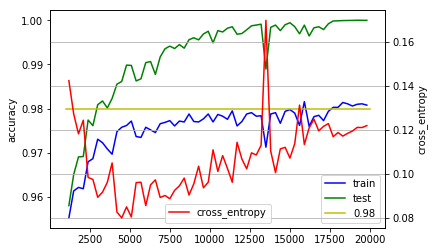

In [15]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [16]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.142343,0.127236,0.118149,0.124339,0.098336,0.097401,0.089293,0.091625,0.096088,0.104920,...,0.121558,0.122817,0.116850,0.118744,0.117128,0.118362,0.119427,0.121076,0.121013,0.121899
test,0.958073,0.965091,0.969091,0.969182,0.977436,0.976164,0.980891,0.981745,0.980164,0.982327,...,0.997891,0.999200,0.999836,0.999873,0.999927,0.999945,0.999964,1.000000,0.999982,0.999982
train,0.955300,0.961400,0.962200,0.961900,0.968000,0.968700,0.973100,0.972300,0.970900,0.969700,...,0.977300,0.979400,0.980300,0.980300,0.981400,0.981100,0.980600,0.981000,0.981100,0.980800


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化
- 初始化**多层隐层初始化$\sqrt{\frac{2}{n_{in}}}$确实比$\sqrt{\frac{1}{n_{in}}}$更快达到收敛后97%**
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

四层隐层之后,改变初始化后,正确率达到97%

## 结论

适当改变初始化